<a href="https://colab.research.google.com/github/BenaData/Data-Analysis/blob/master/income_census_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

The purpose of this project is to perform exploratory data analysis on the income census data for aldults obtained from from UCI public database to answer the following questions.

i)	Which level of education had majority of the employees reached?

ii)	How many employees were married to a civilian spouse?

iii) What as the distribution of employees by work-class?

iv)	Which race had people with highest average capital gains?

v) what was the age of the oldest person in every work class?

In [ ]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the income data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age","work-class","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
data = pd.read_csv(url, names=columns, sep=",", na_values="?", skipinitialspace=True)

**DATA CLEANING**

In [3]:
#checking the first five rows of the dataset
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#descriptive statistics summary of the data
#only the numerical varibles appear in the summary statistics
data.describe()

In [7]:
#checking the dimensions of the data
data.shape

(32561, 15)

In [9]:
#checking the existence of null values
data.isnull().sum()

age                  0
work-class        1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [37]:
#dropping the rows with null values
df=data.dropna()

In [38]:
#checking if the null values are droped
df.isna().sum()

age               0
work-class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [39]:
#checking the number of rows in the remaining data
df.shape

(30162, 15)

In [40]:
#checking the data types
df.dtypes

age                int64
work-class        object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [41]:
cat_arr = np.array(pd.Categorical(df['relationship']).categories)
cat_arr

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

**EXPLORATORY DATA ANALYSIS**

**1) Which level of education had majority of the employees reached?**

In [42]:
df['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

**INSIGHT**
Most employees were high school graduates(9840). Very few employees(45) had preschool as their highest level of education

**ii) How many employees were married to a civilian spouse?**

In [43]:
df['marital-status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

**INSIGHT** 14065 employees were maried to civilian spouses.

**iii) What as the distribution of employees by work-class?**

In [47]:
df.groupby("sex")["sex"].count()

sex
Female     9782
Male      20380
Name: sex, dtype: int64

**INSIGHT** Most of the employees were male(20380) compared to female (20380)

**iv)	Which race had people with highest average capital gains?**

In [50]:
df.groupby("race")["capital-gain"].mean()

race
Amer-Indian-Eskimo     660.290210
Asian-Pac-Islander    1304.375419
Black                  604.722045
Other                 1060.653680
White                 1142.651024
Name: capital-gain, dtype: float64

**INSIGHT** The Asian-Pac-Islander had the highest average capital gains with 1304.375419 while the blacks had the lowest (604.722045).

**v) which work class had young people?**

In [53]:
df.groupby("work-class")["age"].mean()

work-class
Federal-gov         42.577943
Local-gov           41.743106
Private             36.794355
Self-emp-inc        46.027933
Self-emp-not-inc    45.011605
State-gov           39.362002
Without-pay         47.785714
Name: age, dtype: float64

**INSIGHT**
The figure below shows the average age of people in each work class. According to the figure, people working in the private sector were the youngest.


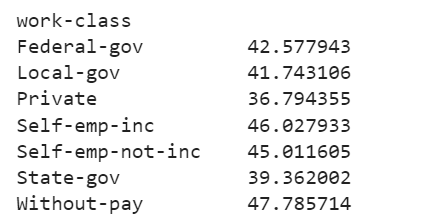
